c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

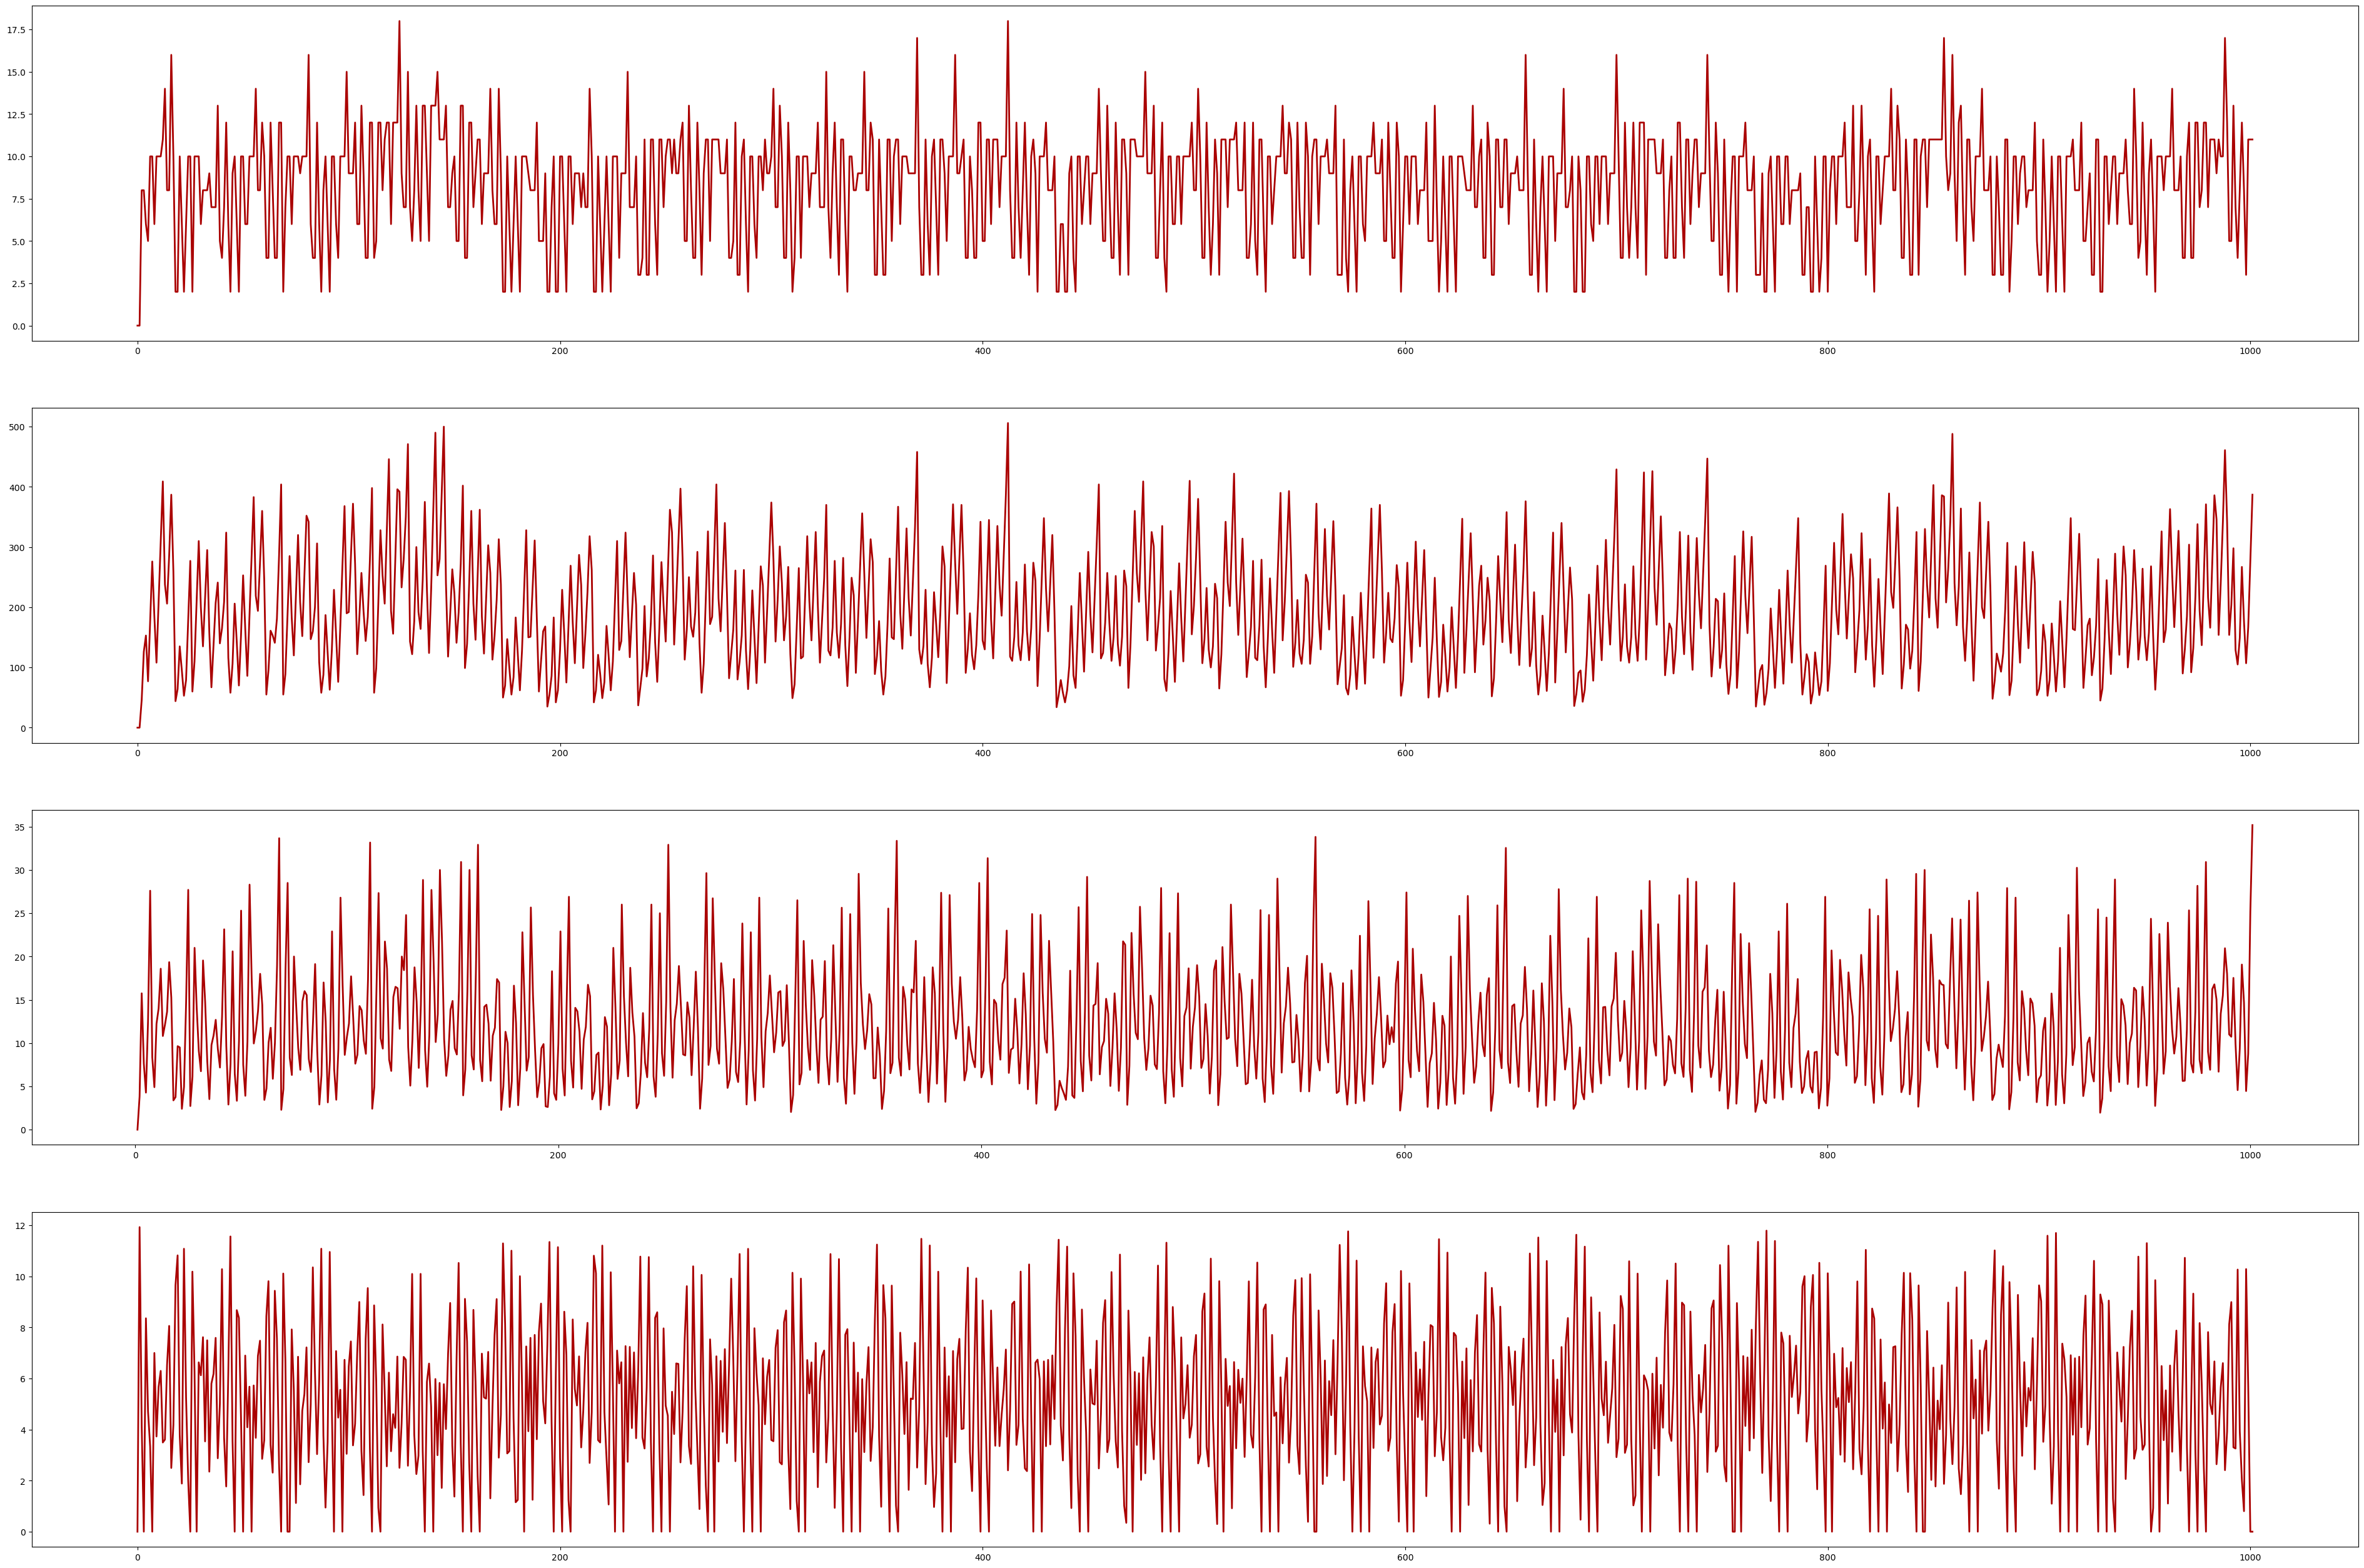

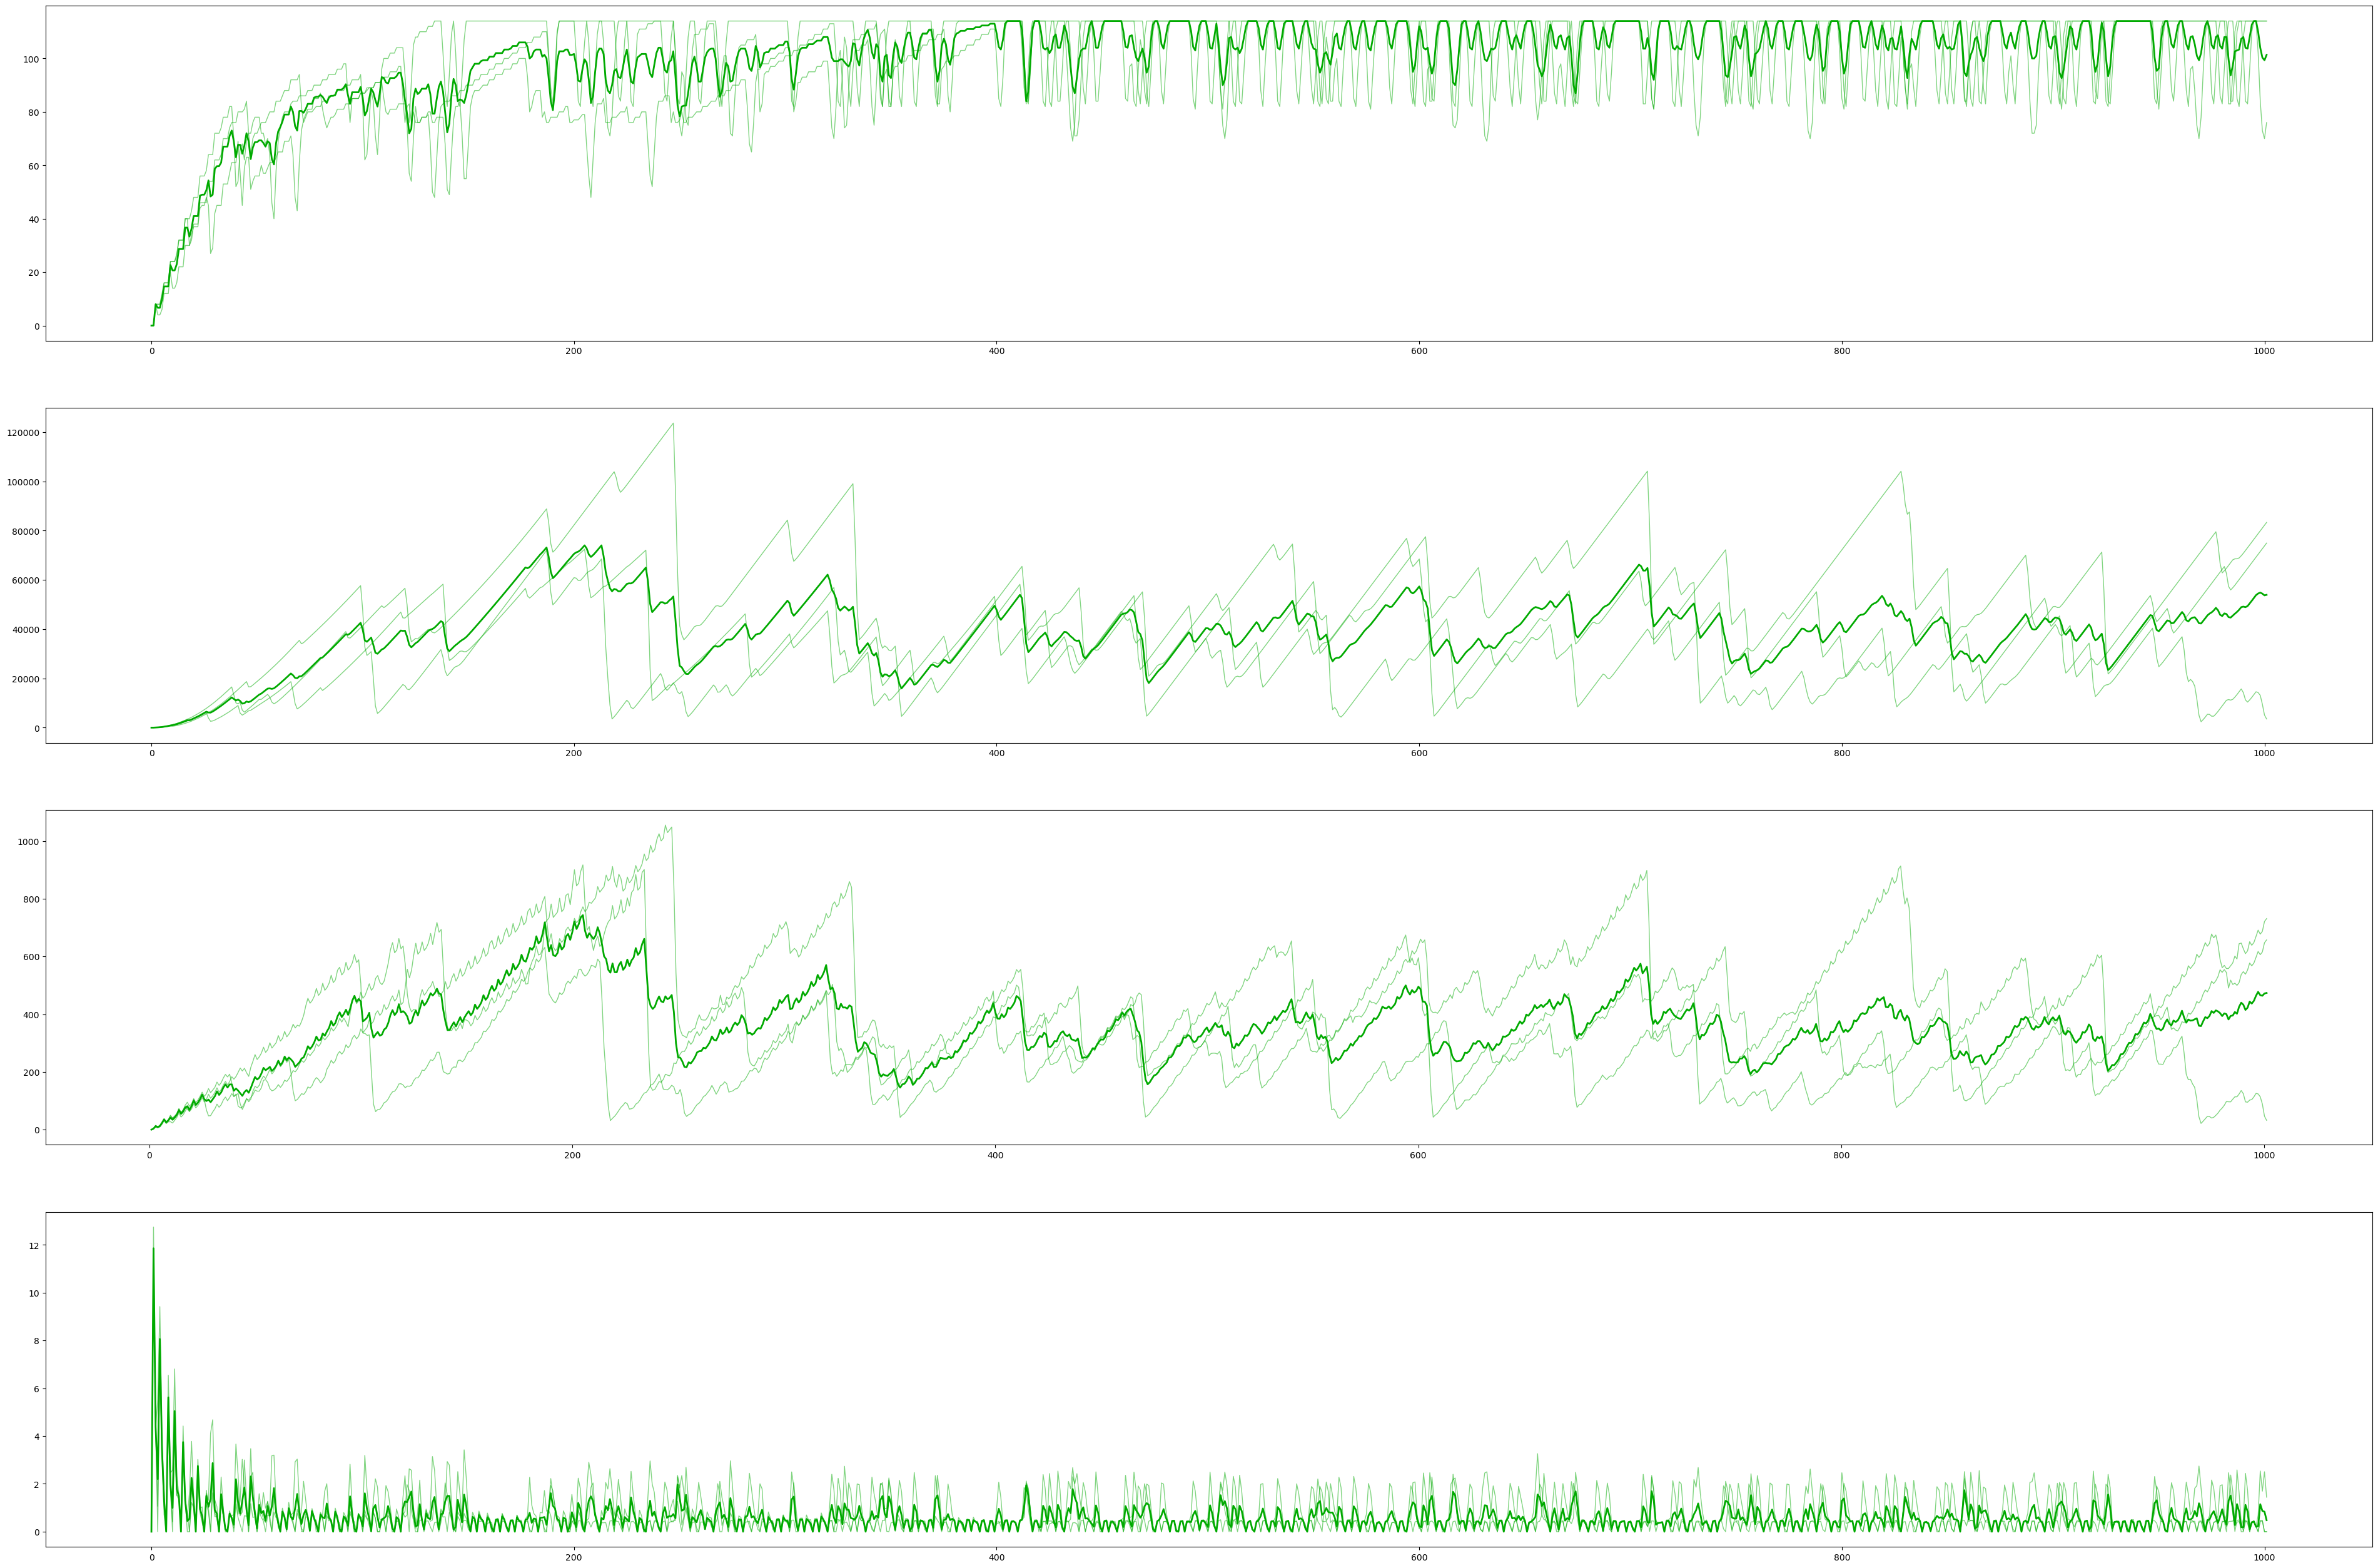

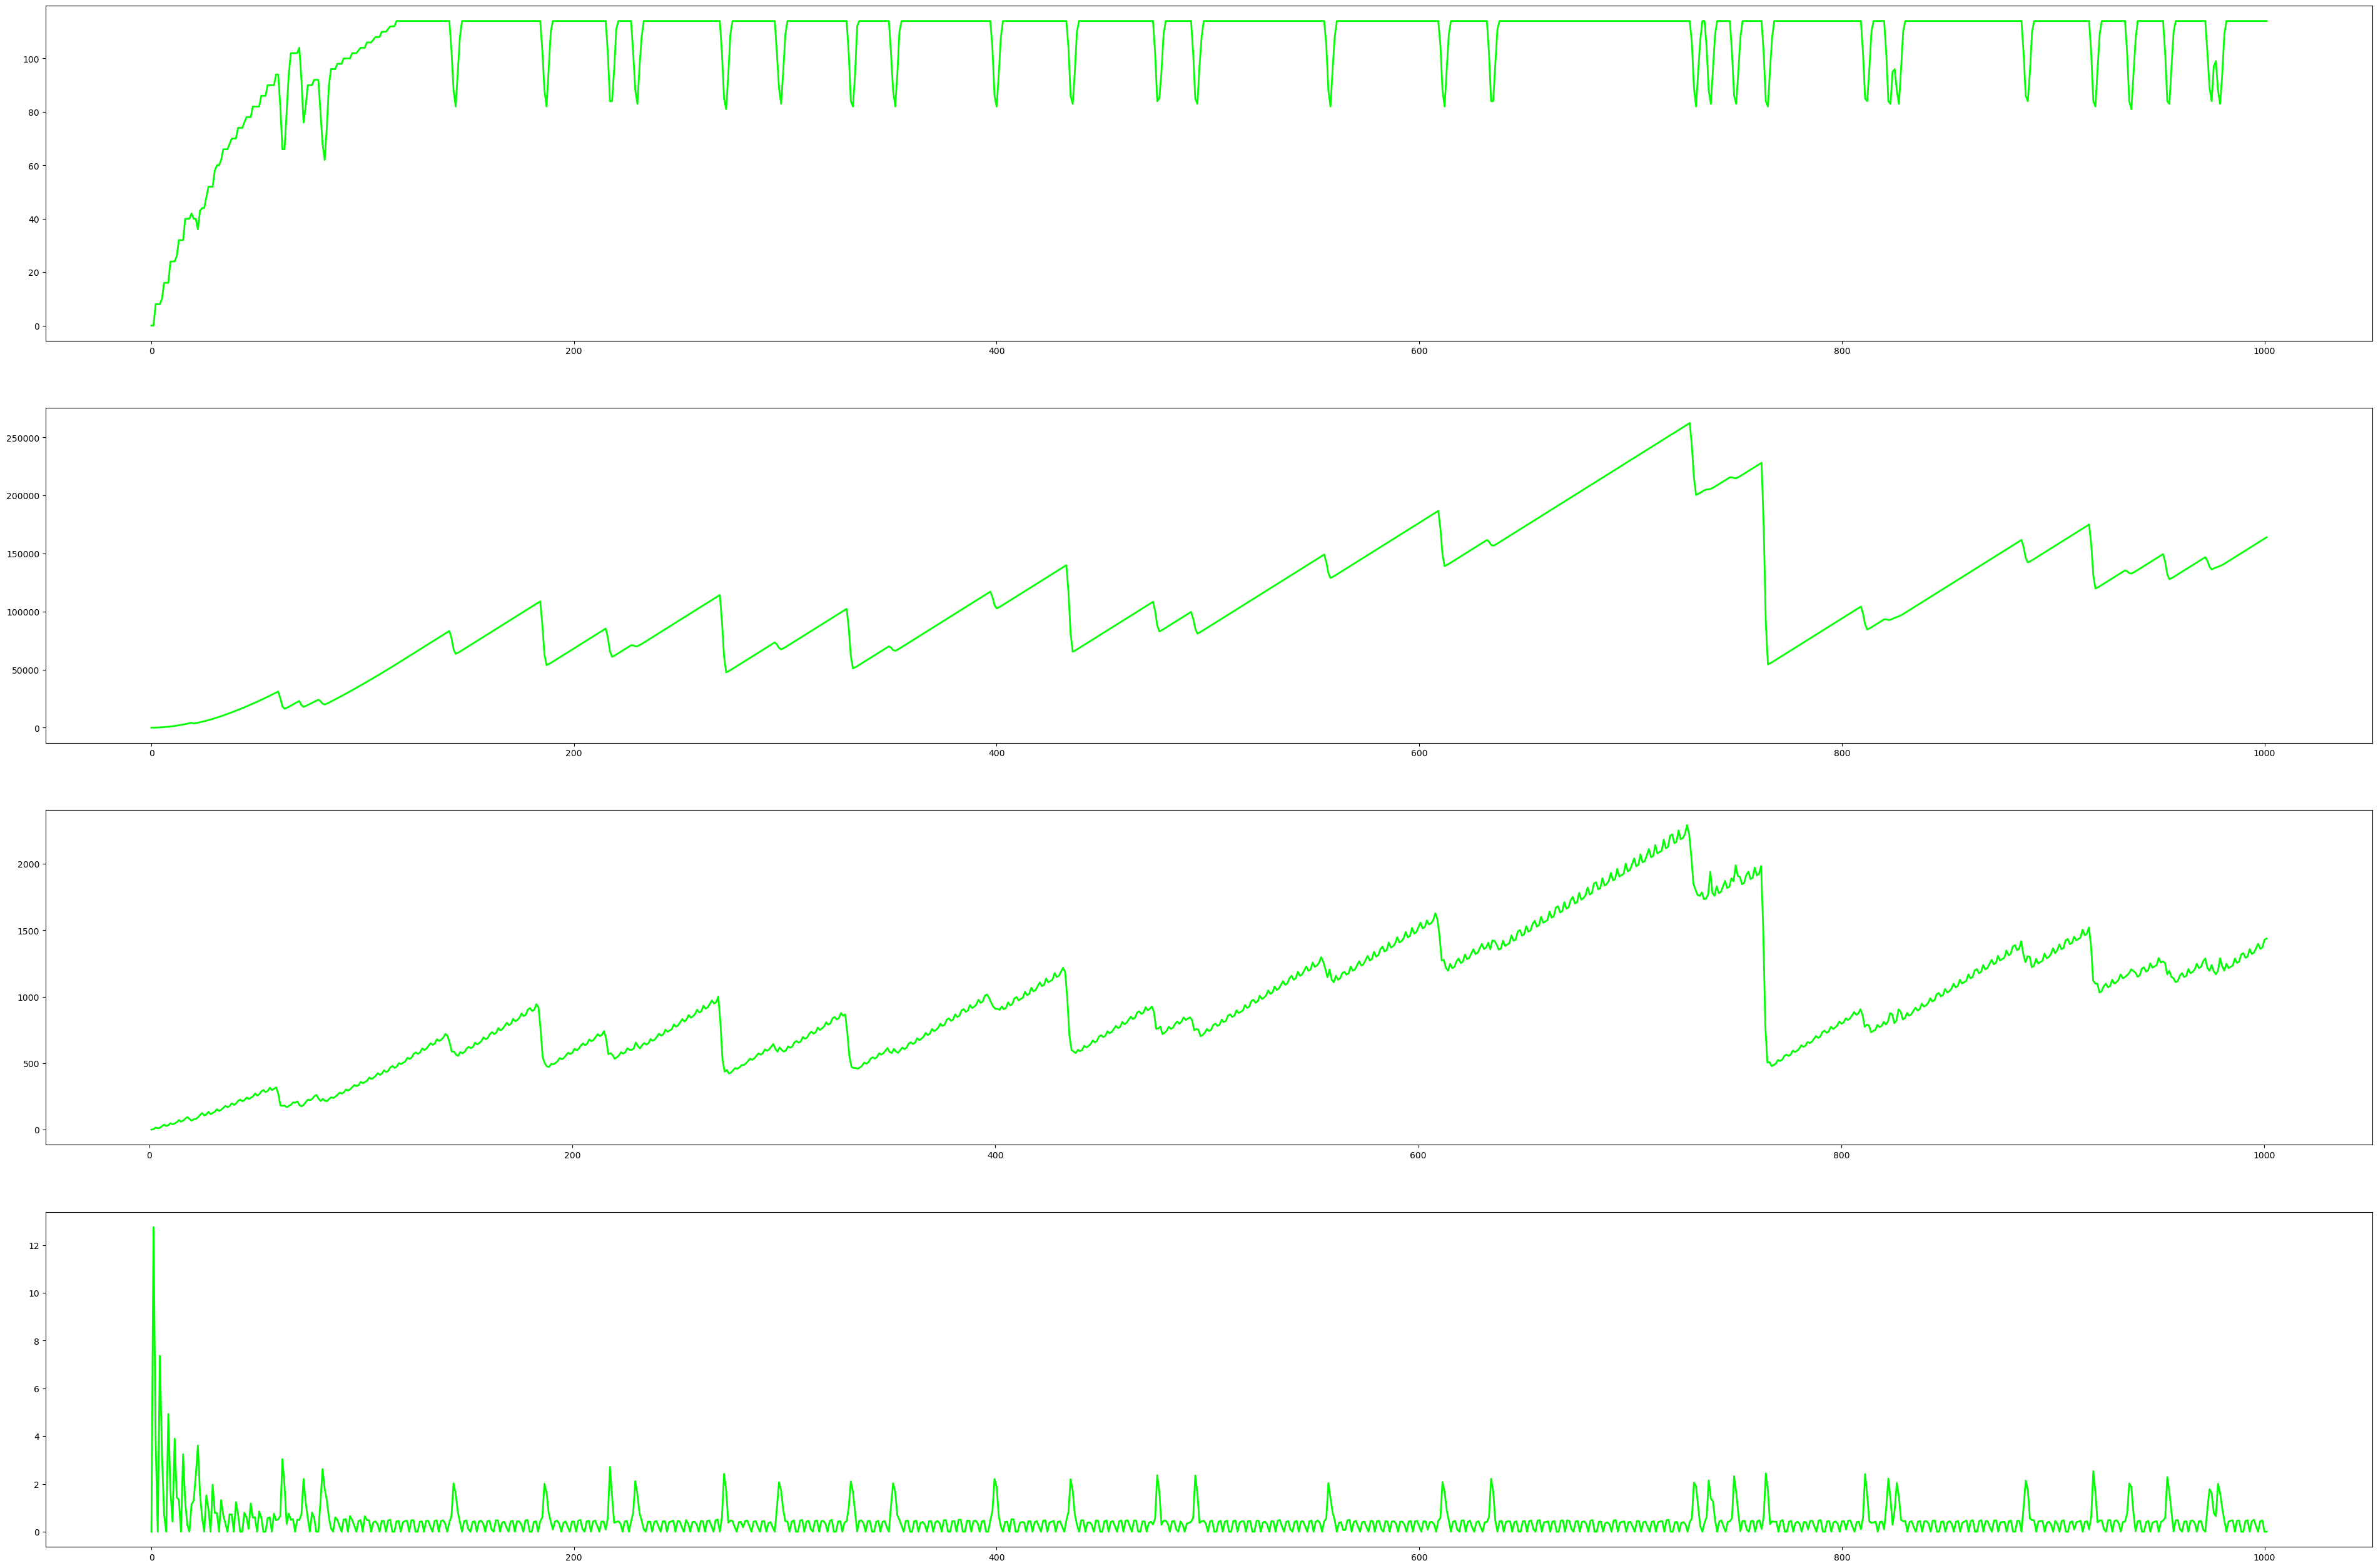

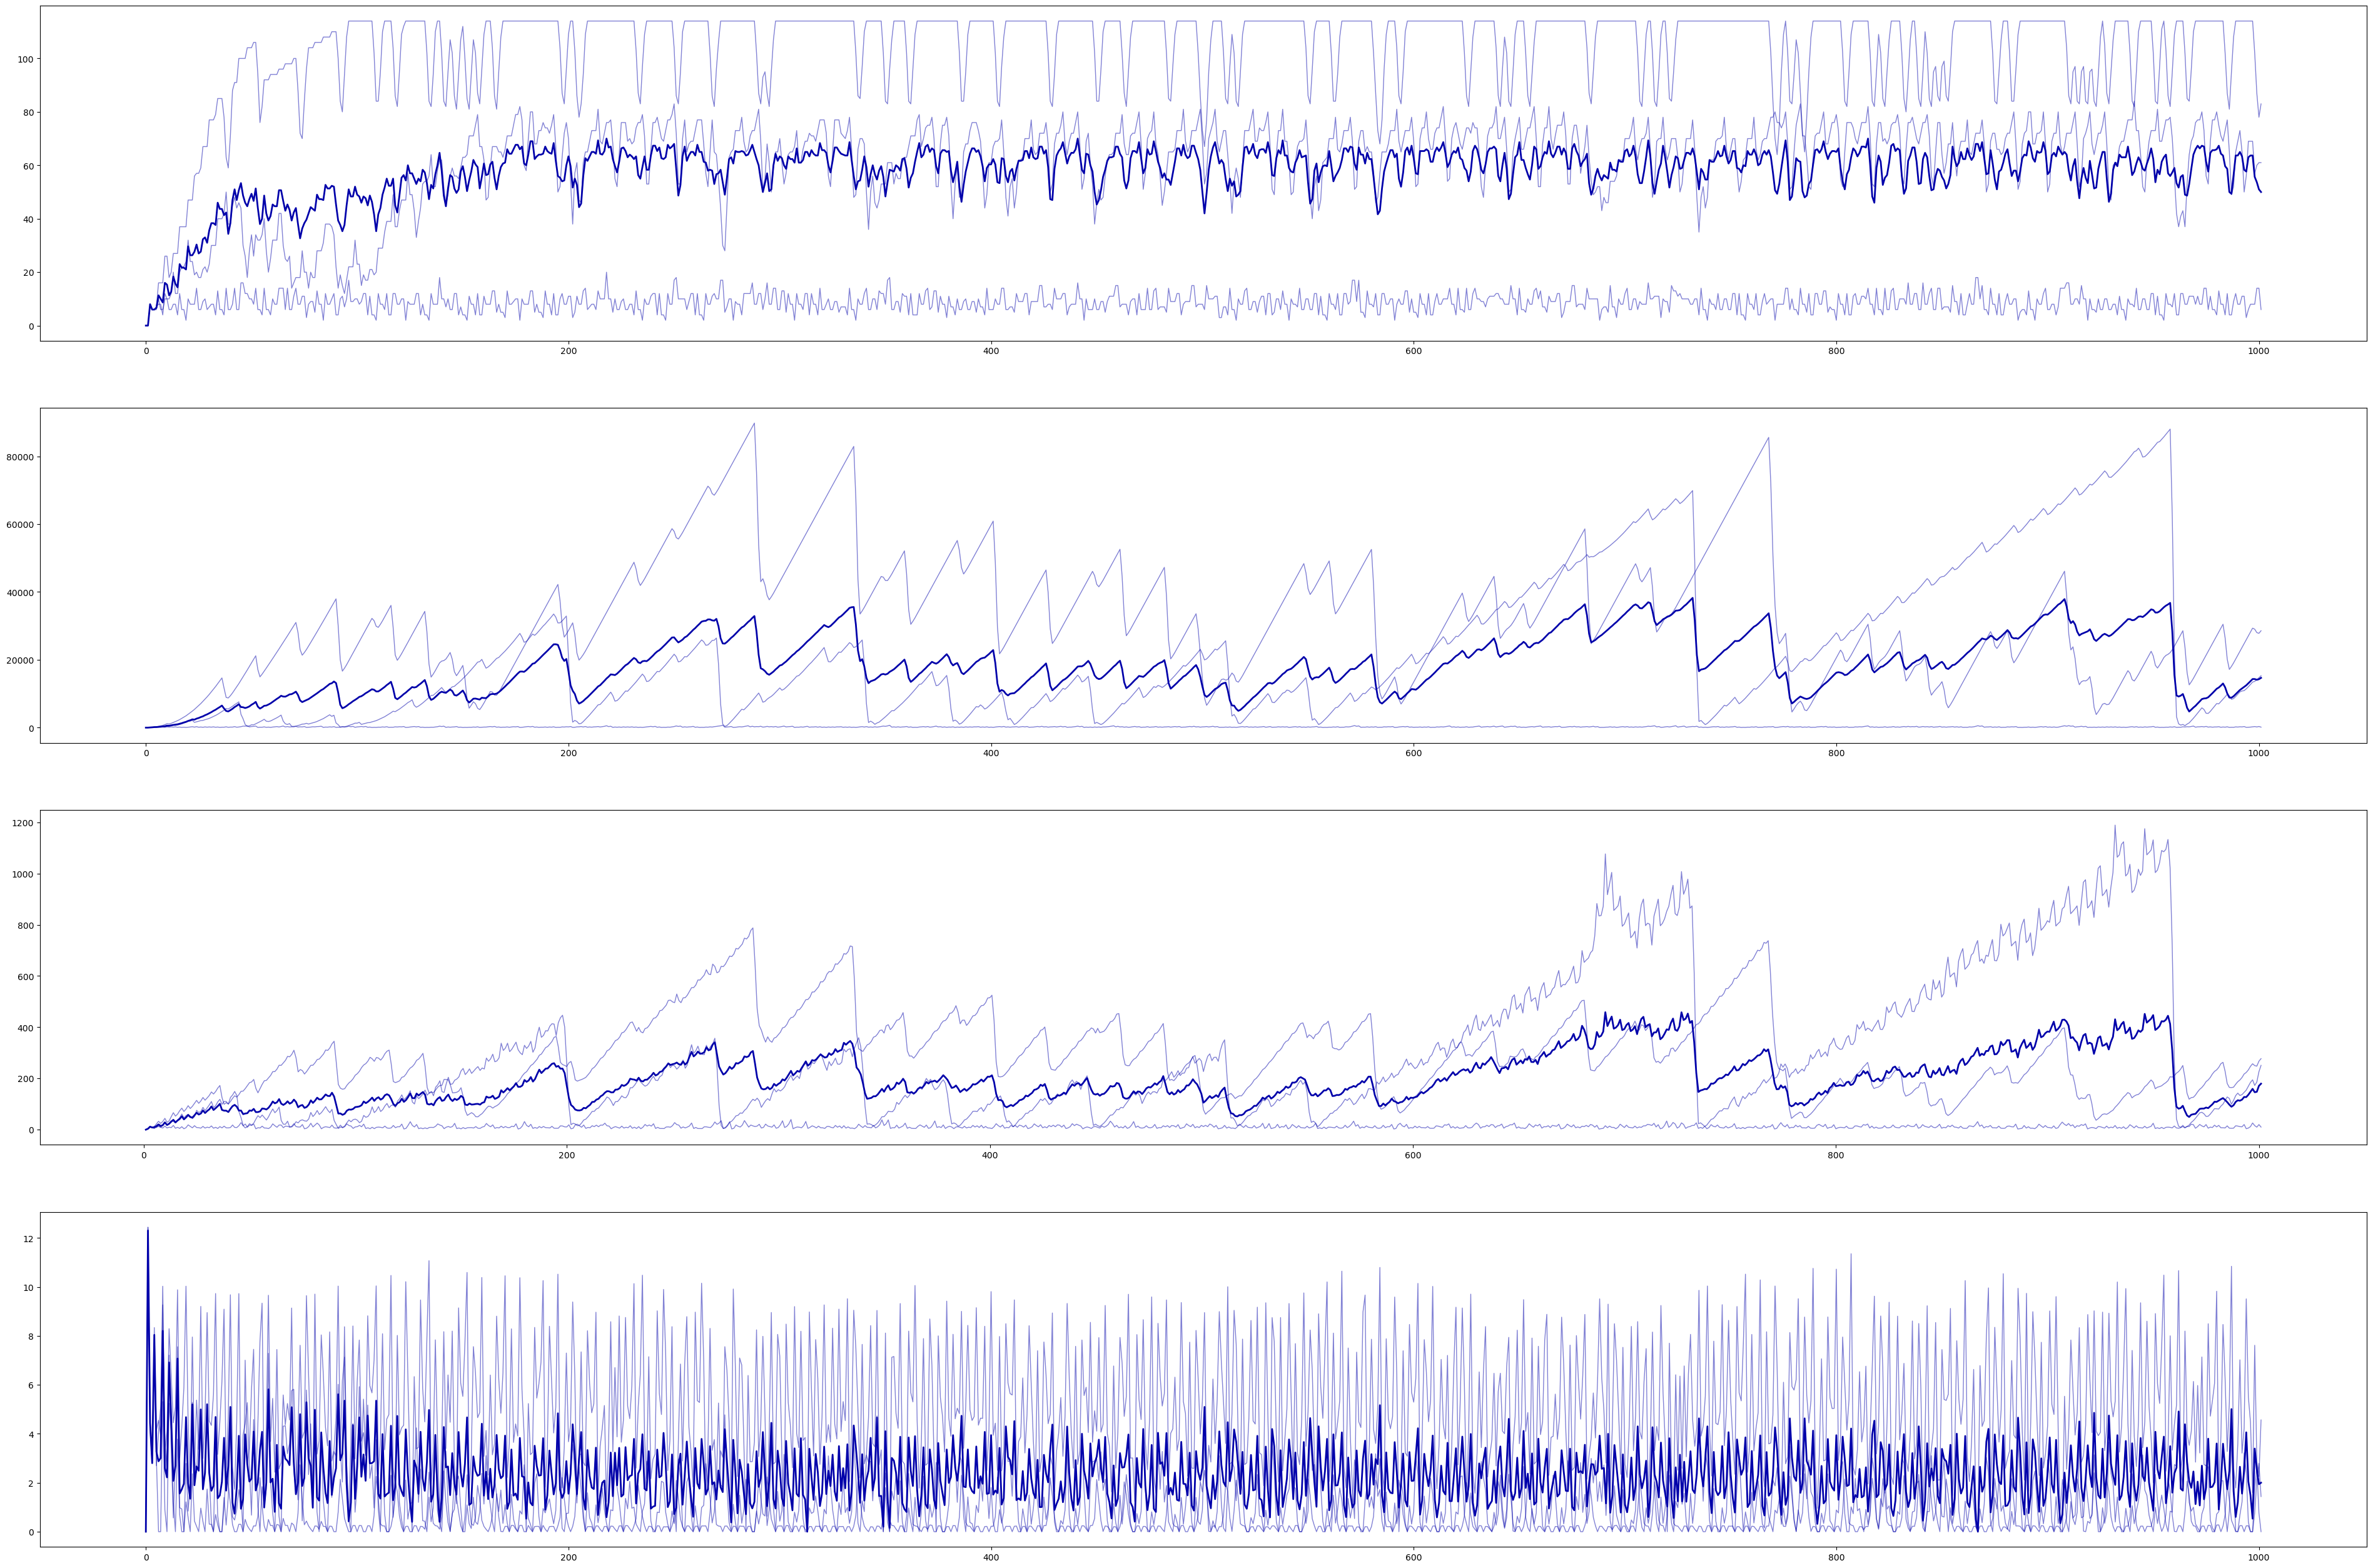

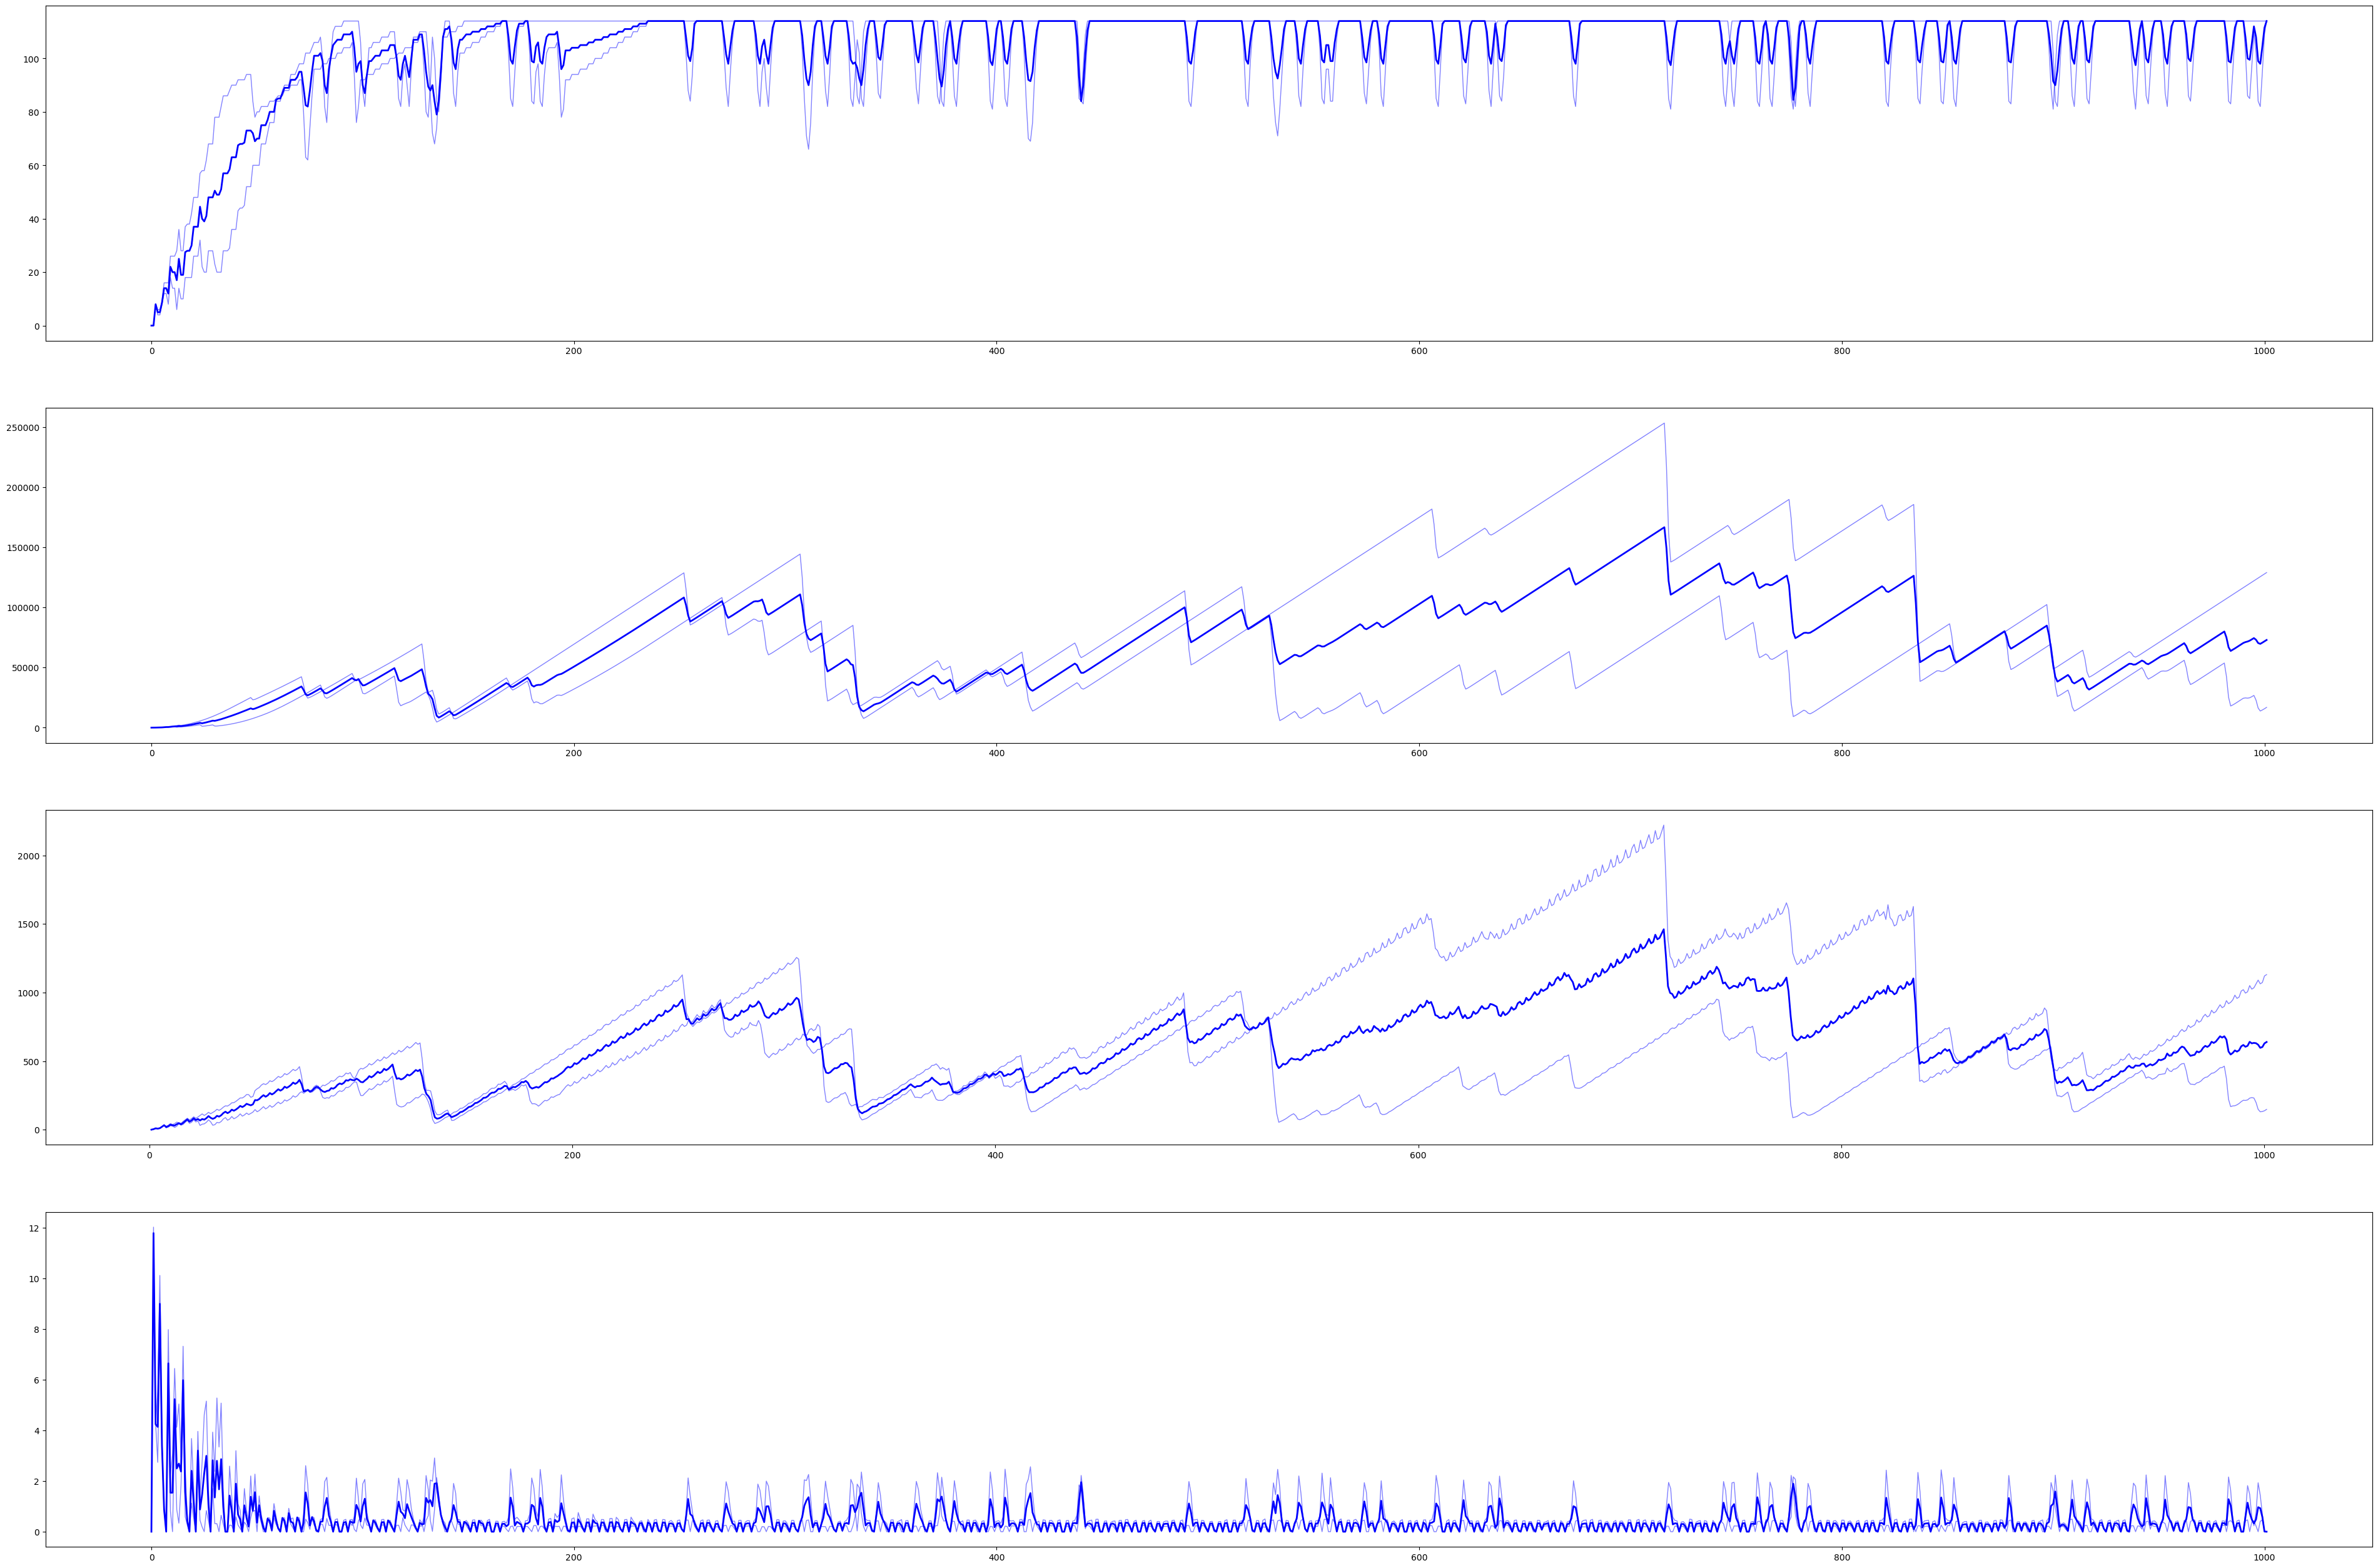

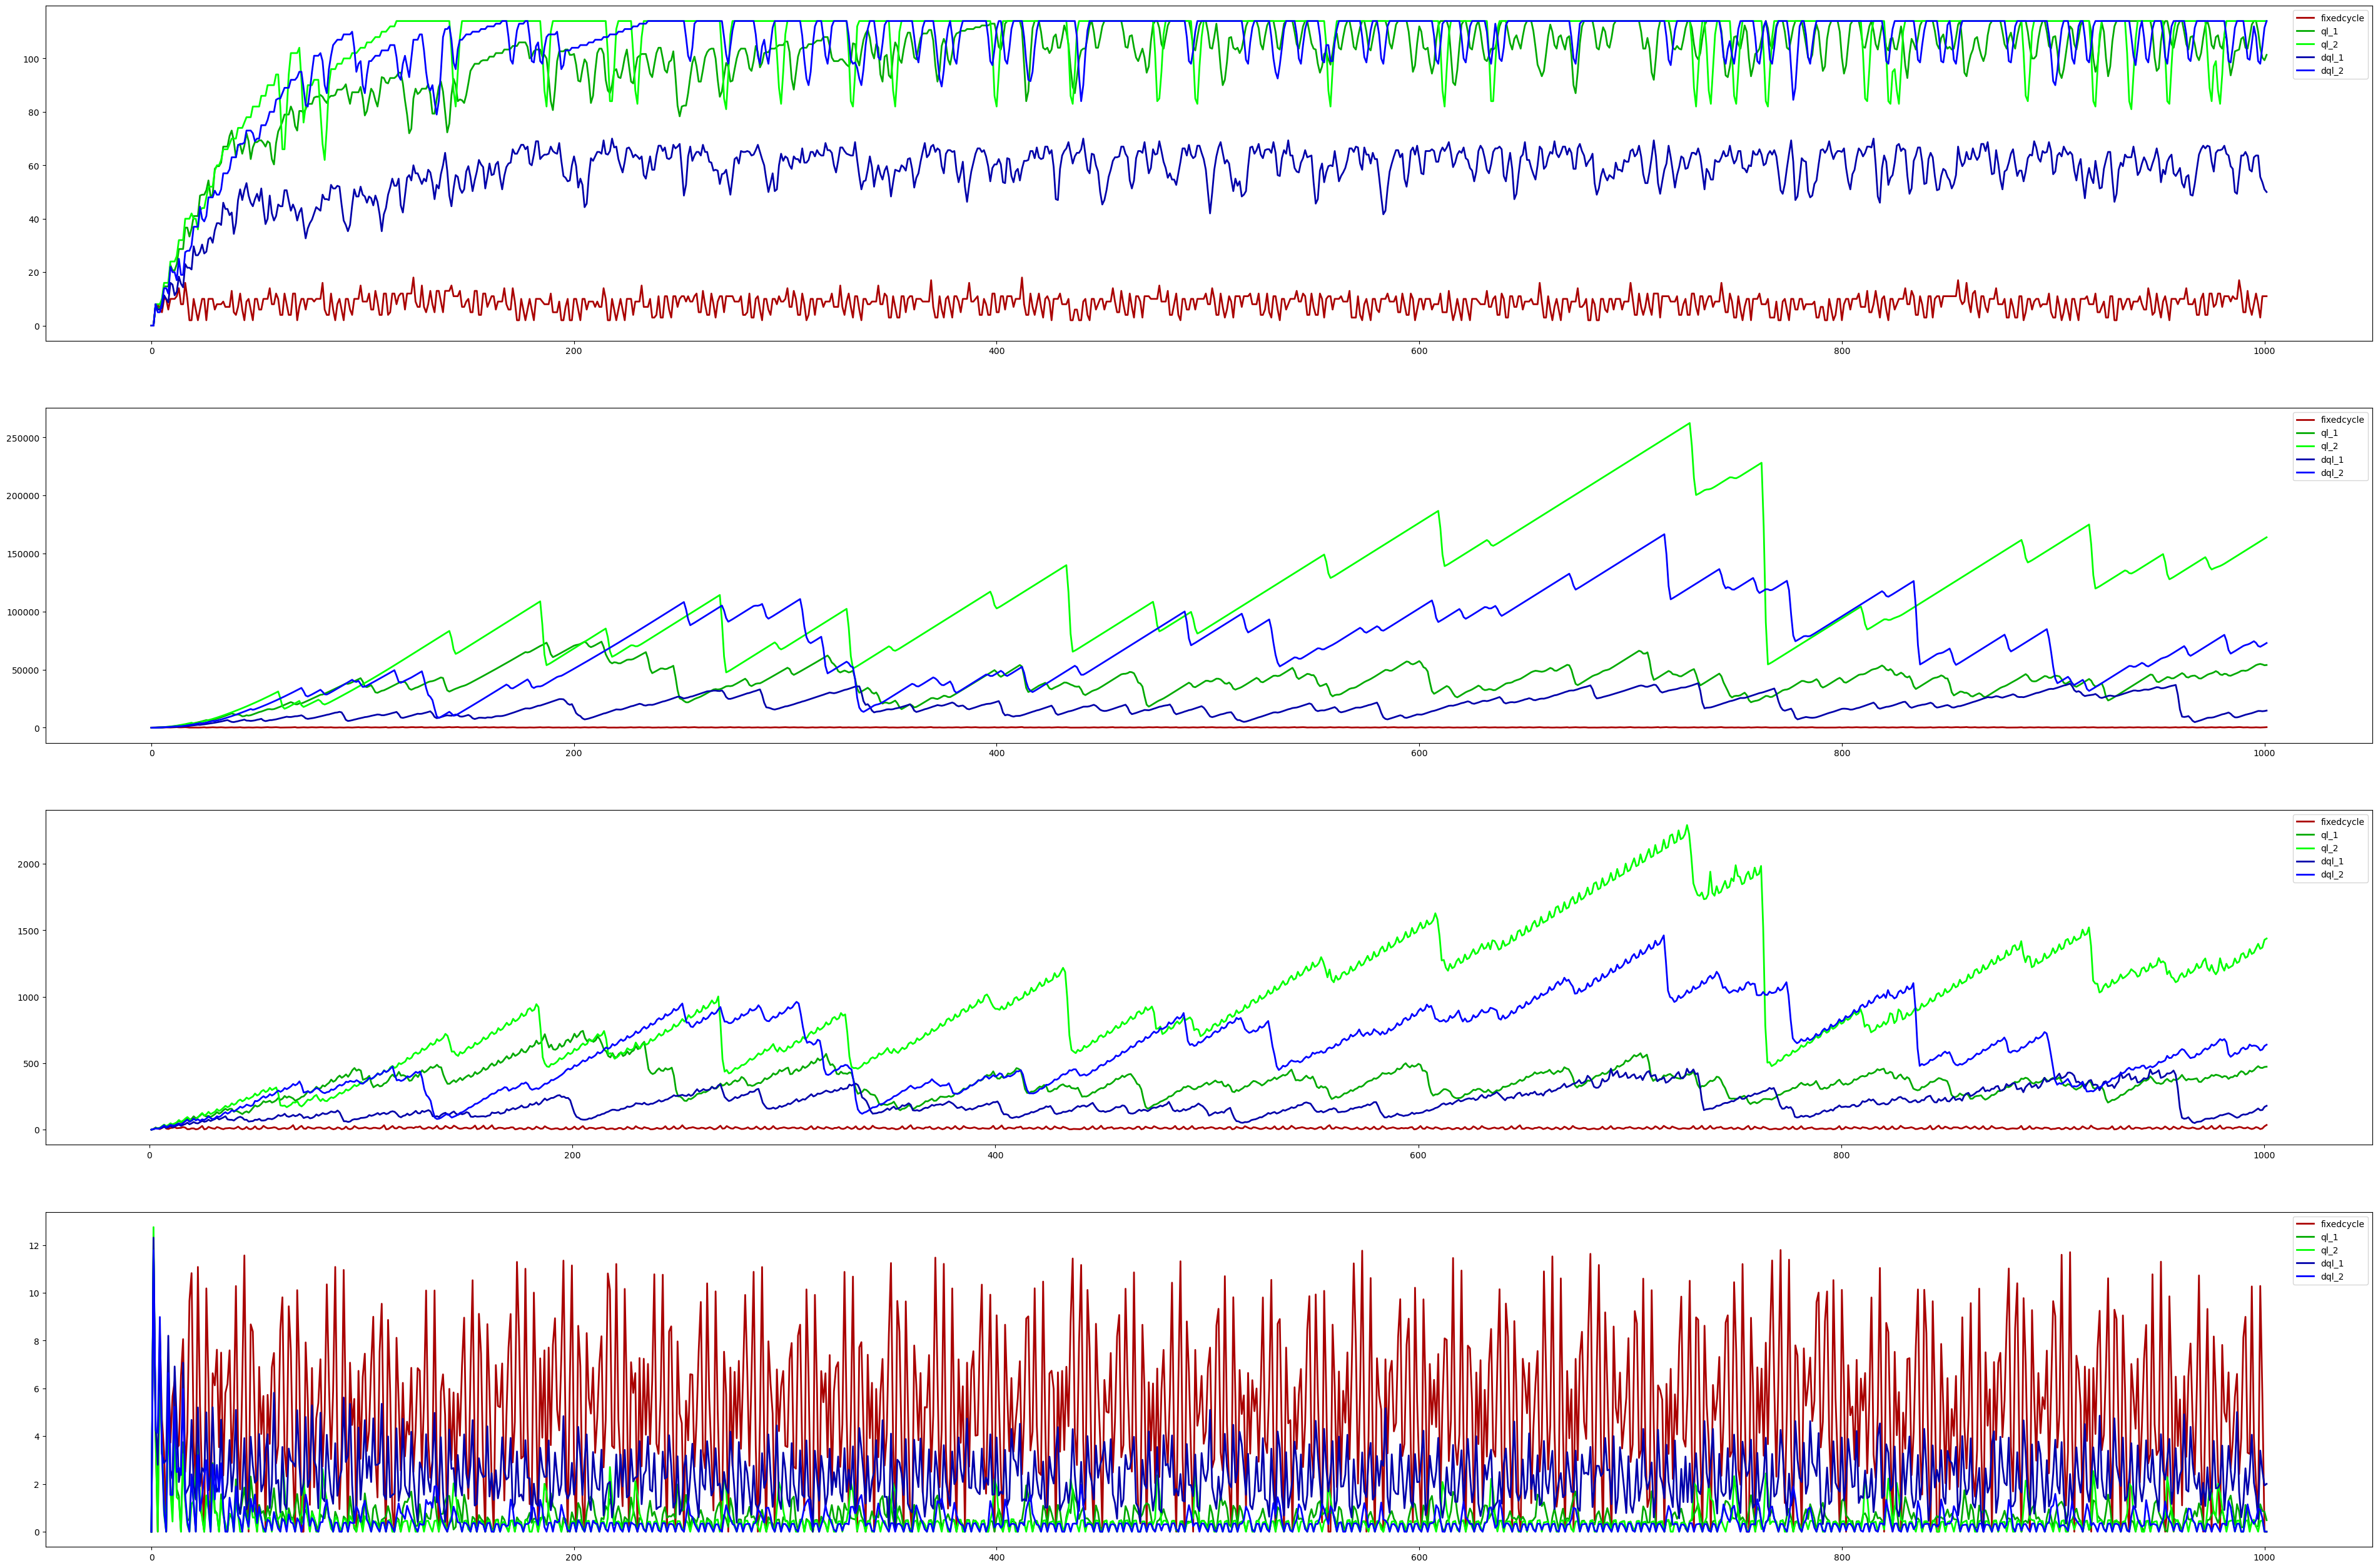

In [7]:
%matplotlib inline
from utils.runner import RunsConfig, Runner
from utils.plotter import CanvasConfig
from traffic.environment import TrafficEnvironment
from traffic.agent import FixedCycleTrafficAgent, QLTrafficAgent, DQLTrafficAgent

canvas_config = CanvasConfig(
  [
    'system_total_stopped',
    'system_total_waiting_time',
    'system_mean_waiting_time',
    'system_mean_speed'
  ],
  1,
  100
)

traffic_env = TrafficEnvironment(
  net = '2way-single-intersection/2way-single-intersection.net.xml',
  rou = '2way-single-intersection/2way-single-intersection-2.rou.xml',
  seconds = 5000,
  delta_time = 10,
  yellow_time = 4,
  min_green = 10,
  max_green = 50
)

configs: list[RunsConfig] = [
  {
    'cls': FixedCycleTrafficAgent,
    'configs': [
      {
        'name': 'fixedcycle',
        'repeat': 1,
        'color': '#aa0000'
      }
    ]
  },
  {
    'cls': QLTrafficAgent,
    'configs': [
      {
        'name': 'ql_1',
        'repeat': 3,
        'color': '#00aa00',
        'alpha': 0.1,
        'gamma': 0.75,
        'init_eps': 1,
        'min_eps': 0.1,
        'decay': 0.9
      },
      {
        'name': 'ql_2',
        'repeat': 1,
        'color': '#00ff00',
        'alpha': 0.2,
        'gamma': 0.6,
        'init_eps': 1,
        'min_eps': 0.05,
        'decay': 0.5
      }
    ]
  },
  {
    'cls': DQLTrafficAgent,
    'configs': [
      {
        'name': 'dql_1',
        'repeat': 3,
        'color': '#0000ff',
        'alpha': 0.2,
        'gamma': 0.6,
        'init_eps': 1,
        'min_eps': 0.01,
        'decay': 0.99
      },
      {
        'name': 'dql_1',
        'repeat': 3,
        'color': '#0000ff',
        'alpha': 0.2,
        'gamma': 0.75,
        'init_eps': 1,
        'min_eps': 0.01,
        'decay': 0.99
      },
      {
        'name': 'dql_1',
        'repeat': 3,
        'color': '#0000ff',
        'alpha': 0.2,
        'gamma': 0.8,
        'init_eps': 1,
        'min_eps': 0.01,
        'decay': 0.99
      }
    ]
  }
]

runner = Runner(canvas_config, traffic_env, configs)

runner.run(runner.learn(), 5000, False)